In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading result file
elo_rating = pd.read_csv(r'..\group matches elo prediction.csv')
#List of 16 countries which were qualified to the nex
next_level_teams = pd.read_csv(r'..\nextLevel.csv')

In [3]:
elo_rating.columns.values

array(['Team A', 'Region A', 'Team B', 'Region B', 'Rank A', 'Rank B',
       'Rating A', 'Rating B', 'Wininng A', 'Wininng  B', 'Round ',
       'Result', 'Goal A', 'Goal B', 'Advancment A', 'Go home A',
       'Advancment B', 'Go home B'], dtype=object)

#Descriptions of fields 
Team A  - Name of home team 
Region A - Region (confederation ) to which team A below
Team B - Name of away team 
Region B -  Region (confederation ) to which team B below
Rank A - Postion of team in A in elo rank 
Rank B - Postion of team in B in elo rank
Rating A - Number of points for team A (elo rank)
Rating B - Number of points for team A (elo rank)
Wininng A - Percantege that team A wins ( elo rank )
Wininng  B - Percantege that team B wins ( elo rank )
Round - Round 
Result - which team one: A- if team A, B if team B, D for draft
Goal A - number of goals for team A
Goal B - number of goals for team B
Advancment A - 1 if before starting round team in ensured that already qualified, 0 in other case
Go home A  -  1 if before starting round team goes home , 0 in other case
Advancment B - 1 if before starting round team in ensured that already qualified, 0 in other case
Go home B - 1 if before starting round team goes home , 0 in other case


In [4]:
elo_rating.head(10)

,Team A,Region A,Team B,Region B,Rank A,Rank B,Rating A,Rating B,Wininng A,Wininng B,Round,Result,Goal A,Goal B,Advancment A,Go home A,Advancment B,Go home B
0,Qatar,AFC,Equador,CONMEBOL,47,18,1680,1833,42,58,1,B,0,2,0,0,0,0
1,England,UEFA,Iran,AFC,13,24,1920,1797,67,33,1,A,6,2,0,0,0,0
2,Netherlands,UEFA,Senegal,CAF,4,45,2040,1687,88,12,1,A,2,0,0,0,0,0
3,United States,CONCACAF,Wales,UEFA,23,25,1798,1790,51,49,1,D,1,1,0,0,0,0
4,Argentina,CONMEBOL,Saudi Arabia,AFC,2,55,2143,1635,95,5,1,B,1,2,0,0,0,0
5,Australia,AFC,France,UEFA,38,7,1719,2005,16,84,1,B,1,4,0,0,0,0
6,Denmark,UEFA,Tunisia,CAF,9,40,1971,1707,82,18,1,D,0,0,0,0,0,0
7,Mexico,CONCACAF,Poland,UEFA,22,21,1809,1814,49,51,1,D,0,0,0,0,0,0
8,Belgium,UEFA,Canada,CONCACAF,5,29,2007,1776,79,21,1,A,1,0,0,0,0,0
9,Costa Rica,CONMEBOL,Spain,UEFA,35,3,1743,2048,15,85,1,B,0,7,0,0,0,0


In [5]:
#Lets build list of countries with ranking place and rating points 
teamsB = elo_rating[['Team B', 'Region B', 'Rating B', 'Rank B']].loc[elo_rating['Round '] == 1]
teamsB.columns = ['Team', 'Region', 'Rating', 'Rank'] 
teamsB.info()
teamsA = elo_rating[['Team A', 'Region A', 'Rating A', 'Rank A']].loc[elo_rating['Round '] == 1]
teamsA.columns = ['Team', 'Region', 'Rating', 'Rank'] 
teamsA.info()
teams = pd.concat([teamsA, teamsB], axis=0 ).sort_values('Rating',  ascending=False).drop_duplicates().reset_index(drop=True)
teams.describe(include=["O"])
teams.head(32)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    16 non-null     object
 1   Region  16 non-null     object
 2   Rating  16 non-null     int64 
 3   Rank    16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    16 non-null     object
 1   Region  16 non-null     object
 2   Rating  16 non-null     int64 
 3   Rank    16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


,Team,Region,Rating,Rank
0,Brazil,CONMEBOL,2168,1
1,Argentina,CONMEBOL,2143,2
2,Spain,UEFA,2048,3
3,Netherlands,UEFA,2040,4
4,Belgium,UEFA,2007,5
5,Portugal,UEFA,2006,6
6,France,UEFA,2005,7
7,Denmark,UEFA,1971,9
8,Germany,UEFA,1963,10
9,Uruguay,CONMEBOL,1936,11


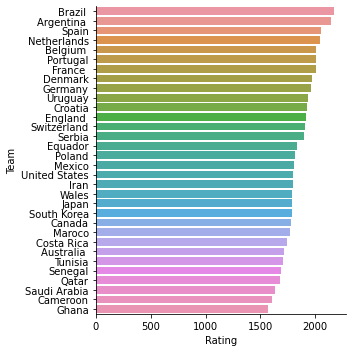

In [6]:
#Lets plot team and their points in ranking
sns.catplot(data=teams, kind="bar",  x= "Rating" ,y="Team")

In [8]:
# lets see how teams are splitted in the ranges
sliced = pd.cut(teams['Rating'], 6)
print(sliced.value_counts())

(1767.333, 1867.5]      9
(1667.167, 1767.333]    6
(1867.5, 1967.667]      6
(1967.667, 2067.833]    6
(1566.399, 1667.167]    3
(2067.833, 2168.0]      2
Name: Rating, dtype: int64


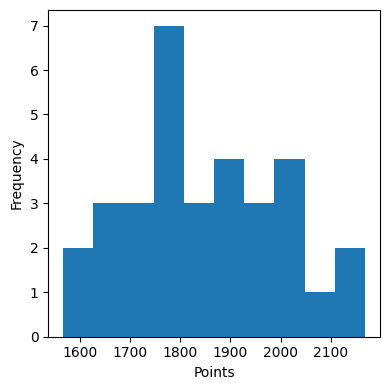

In [10]:
#histogram
ax = teams['Rating'].plot.hist(figsize=(4, 4))
ax.set_xlabel('Points')
plt.tight_layout()
plt.show()

In [11]:
# It looks like there  are two very strong teams Brazil and Argentina. Then we have few groups of 
# countries with very similar number of points. For example difference between Equador ( 14 th place)  
# and Maroco (23 rd place) is only around 70 points

In [12]:
# lets check average rating points by region.
teams[["Region", "Rating"]].groupby(['Region'], as_index=False).mean().sort_values(by='Rating', ascending=False)

,Region,Rating
3,CONMEBOL,1964.600000
4,UEFA,1945.461538
2,CONCACAF,1794.333333
0,AFC,1734.000000
1,CAF,1667.400000


In [13]:
region = teams[["Region", "Rating"]].groupby(['Region'], as_index=False).mean().sort_values(by='Rating', ascending=False)

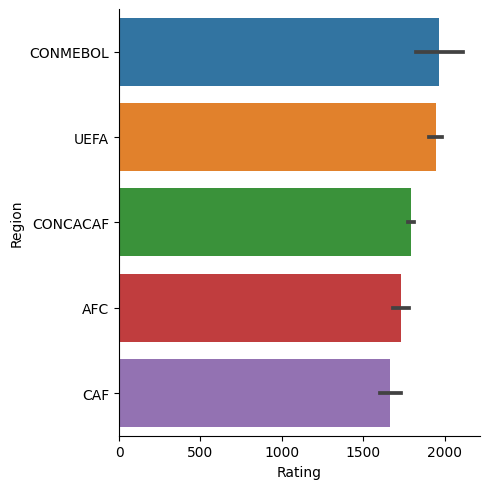

In [14]:
sns.catplot(data=teams, kind="bar",  x= "Rating" ,y="Region")

In [15]:
# the strongest teams come from South America and Europe

In [16]:
# Lets see number of particpants from each region
teams[['Region']].value_counts()

Region  
UEFA        13
AFC          6
CAF          5
CONMEBOL     5
CONCACAF     3
dtype: int64

In [17]:
#To tournament there is only 32 teams qualified. Lets check if we have teams  which are below 
# 32 in ranking 
teams.loc[teams['Rank'] > 32]

,Team,Region,Rating,Rank
24,Costa Rica,CONMEBOL,1743,35
25,Australia,AFC,1719,38
26,Tunisia,CAF,1707,40
27,Senegal,CAF,1687,45
28,Qatar,AFC,1680,47
29,Saudi Arabia,AFC,1635,55
30,Cameroon,CAF,1610,60
31,Ghana,CAF,1567,67


In [18]:
# It looks like 8 teams are in ELO ranking below 32. This is caused that each confederation 
# has constant number of teams which play in World Cup. 

In [19]:
# As this is analysis of performance of rating after  group phase we already have results. So lets
# check what were the lowest ranking team who advance to the next round  
def next_level(team: str) -> int:
    result = 0
    if team in next_level_teams['Team'].values:
        result = 1
    return result

In [20]:
teams['NextLevel'] =  teams["Team"].apply(next_level)

In [21]:
# If system is 100% reliable there should be 16 the best team in 1/8,  but it looks like 7 teams were below 16 place qualified 
# to 1/8
teams.loc[( teams['Rank'] > 16 ) & ( teams['NextLevel'] == 1 ) ]
# Teams which are below 16 in ranking, but finally qualified to 1/8

,Team,Region,Rating,Rank,NextLevel
15,Poland,UEFA,1814,21,1
17,United States,CONCACAF,1798,23,1
20,Japan,AFC,1787,26,1
21,South Korea,AFC,1786,27,1
23,Maroco,CAF,1766,30,1
25,Australia,AFC,1719,38,1
27,Senegal,CAF,1687,45,1


In [22]:
#There are 7 teams. Lowest is Senegal which has only 1687 point and it was 45th team in elo ranking 

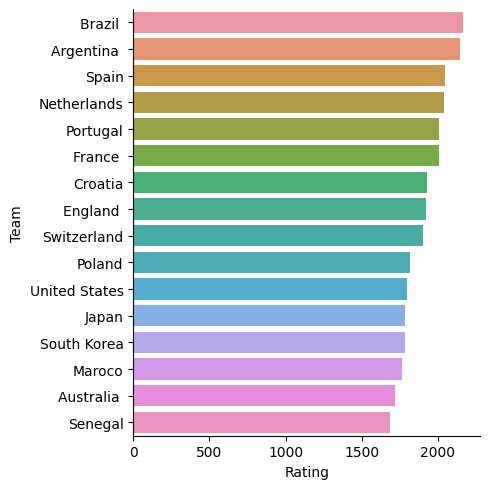

In [23]:
sns.catplot(data=teams.loc[ teams['NextLevel'] == 1  ], kind="bar",  x= "Rating" ,y="Team")

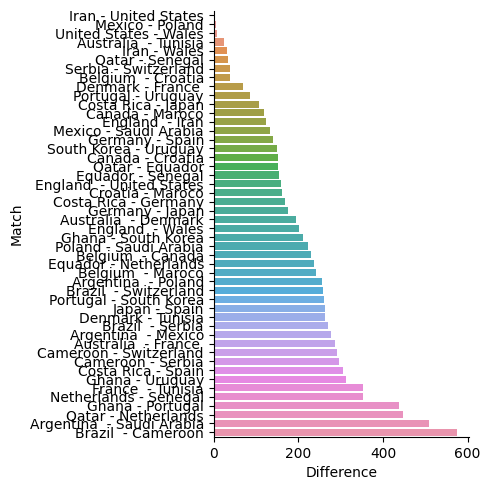

In [24]:
# let see how teams are playing. It looks like we had all kinds of matches. From the teams which are almost on the same level 
# but also teams with huge gap 
elo_rating['Difference'] = abs(elo_rating['Rating A'] - elo_rating['Rating B'])
elo_rating['Match'] =  elo_rating.apply(lambda x:'%s - %s' % (x['Team A'],x['Team B']),axis=1)
sns.catplot(data=elo_rating,  kind="bar",  x= "Difference" ,y="Match", order=elo_rating.sort_values('Difference').Match)

In [25]:
# As prediction in elo rating shows only the percange of rating o winning. I set up that between
# 45% and 55% is considered as DRAFT
def set_result(percentage: int) -> str:
    result: str = 'A'
    if percentage < 45:
        result = 'B'
    elif percentage >= 45 and percentage <= 55:
        result = 'D'
    return result
        

In [26]:
elo_rating['Predicted Result'] =   elo_rating["Wininng A"].apply(set_result)

In [27]:
# comparing prediction with result. Set up 1.00 if prediction was sucessfull, 0.25 if there was
# draft in prediction, but one team one or other way
def compare_prediction_with_result(pred: str, res: str) -> float:
    point: float = 0
    if pred == res:
        point = 1 
    elif (pred == "A" and res == "D") or (pred == "B" and res == "D") or (pred == "D" and res == "A") or (pred == "D" and res == "B"):
        point = 0.5
    return point

In [28]:
elo_rating['Check'] = elo_rating.apply(lambda x: compare_prediction_with_result(x['Predicted Result'], x['Result']), axis=1 )

In [29]:
# Lets map 
elo_rating['CheckDesc']  = elo_rating['Check'].map( {1: 'Success', 0.5:'Partial', 0: 'Failed'} ).astype(str)

In [30]:
pred_Check = elo_rating[['CheckDesc']].value_counts()
#out of 48 matches 27 were predicted succesfully 

CheckDesc
Success      27
Failed       11
Partial      10
dtype: int64


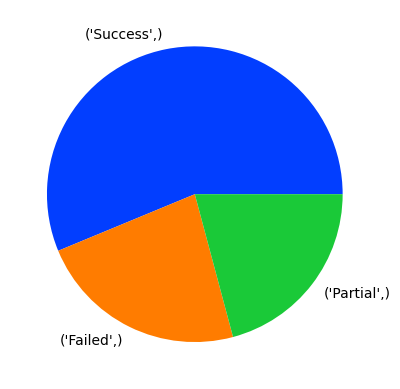

In [31]:
print(pred_Check)
colors = sns.color_palette('bright')
plt.pie(pred_Check,labels=pred_Check.index, colors = colors)
plt.show()

In [32]:
# It looks like elo rating was sucessfull in 27 matches on 48 total games. Partially successull
# in 11 matches.

Round 1
CheckDesc
Success      11
Partial       3
Failed        2
dtype: int64


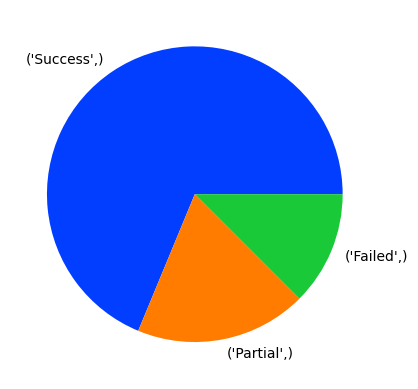

Round 2
CheckDesc
Success      7
Partial      6
Failed       3
dtype: int64


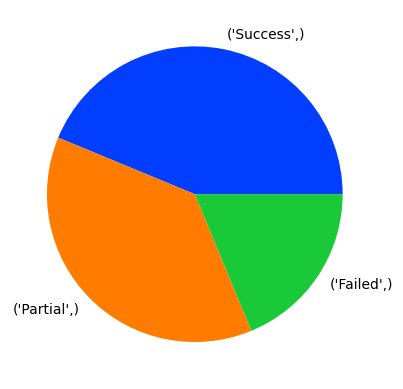

Round 3
CheckDesc
Success      9
Failed       6
Partial      1
dtype: int64


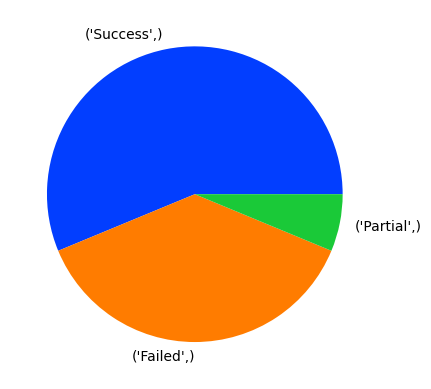

In [33]:
# Lets check how prediction went during each round
for i in range(1, 4):
    pred_Check_Round = elo_rating[['CheckDesc']].loc[elo_rating['Round '] == i].value_counts()
    print(f"Round {i}")
    print(elo_rating[['CheckDesc']].loc[elo_rating['Round '] == i].value_counts())
    plt.pie(pred_Check_Round,labels=pred_Check_Round.index, colors = colors)
    plt.show()
    

In [ ]:
# It looks like the best prediction was for round 1. For 16 games elo rating sucessfully predicted 11, 
# 3 games were partially predicted and only 2 totally wrong. It was Germany vs Japan 
# and Argenting vs Saudi Arabia. In both cases difference between teams are huge. Based only 
# on elo rating there is no chance to predict such result    

CheckDesc
Success      4
Partial      1
dtype: int64


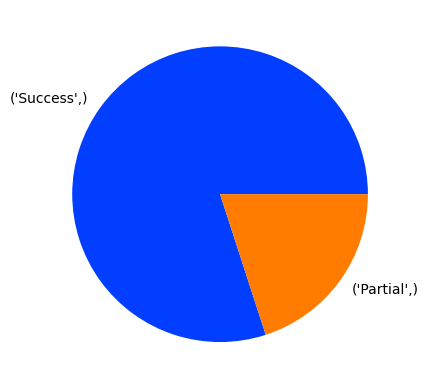

In [34]:
# check prediction on the same region
pred_the_same_region = elo_rating[['CheckDesc']].loc[elo_rating['Region A'] == elo_rating['Region B']].value_counts()
print(pred_the_same_region)
plt.pie(pred_the_same_region,labels=pred_the_same_region.index, colors = colors)
plt.show()

In [35]:
# In the third round there were teams which already qualified to the next round. 
# Lets see if this influended on the results
advancment_3round = elo_rating.loc[( elo_rating['Advancment A'] == 1 ) | ( elo_rating['Advancment B'] == 1 )  ]
advancment_3round.head(5)

,Team A,Region A,Team B,Region B,Rank A,Rank B,Rating A,Rating B,Wininng A,Wininng B,...,Goal B,Advancment A,Go home A,Advancment B,Go home B,Difference,Match,Predicted Result,Check,CheckDesc
38,France,UEFA,Tunisia,CAF,4,43,2046,1694,88,12,...,1,1,0,0,0,352,France - Tunisia,A,0.0,Failed
44,Brazil,CONMEBOL,Cameroon,CAF,1,55,2195,1621,96,4,...,1,1,0,0,0,574,Brazil - Cameroon,A,0.0,Failed
46,Portugal,UEFA,South Korea,AFC,6,34,2010,1750,82,18,...,2,1,0,0,0,260,Portugal - South Korea,A,0.0,Failed


CheckDesc
Failed       3
dtype: int64


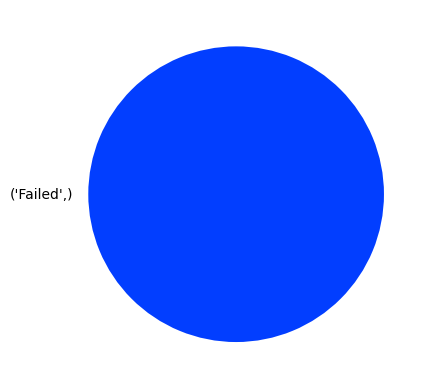

In [36]:
#predictions failed even differences are huge 
advancment_3round_r = advancment_3round[['CheckDesc']].value_counts()
print(advancment_3round_r)
plt.pie(advancment_3round_r,labels=advancment_3round_r.index, colors = colors)
plt.show()